In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [5]:
data = pd.read_csv('train.csv')
data.head()
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
data2 = data.drop(['Name', 'Ticket', 'Cabin', 'Embarked', 'SibSp', 'Parch', 'PassengerId'], axis = 'columns')
test2 = test.drop(['Name', 'Ticket', 'Cabin', 'Embarked', 'SibSp', 'Parch', 'PassengerId'], axis = 'columns')
data2.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [7]:
data2.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [9]:
data2.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

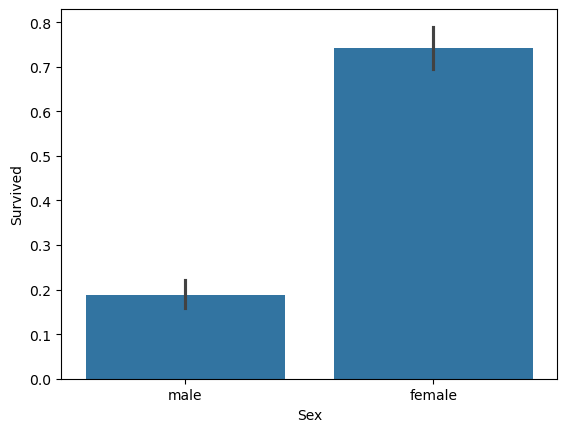

In [10]:
sns.barplot(x='Sex', y = 'Survived', data=data2)


<Axes: xlabel='Age', ylabel='Count'>

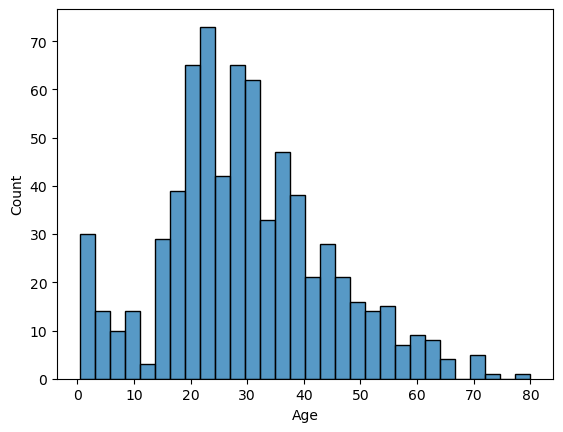

In [11]:
sns.histplot(data2['Age'].dropna(), kde=False, bins = 30)

In [12]:
data2['Age'].fillna(data2['Age'].median(), inplace=True)
test2['Age'].fillna(test2['Age'].median(), inplace=True)


C:\Users\harsh\AppData\Local\Temp\ipykernel_38256\3778296602.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data2['Age'].fillna(data2['Age'].median(), inplace=True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_38256\3778296602.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [13]:
data3 = pd.get_dummies(data2, columns = ['Sex'], drop_first = True)
data3.head()

,Survived,Pclass,Age,Fare,Sex_male
0,0,3,22.0,7.2500,True
1,1,1,38.0,71.2833,False
2,1,3,26.0,7.9250,False
3,1,1,35.0,53.1000,False
4,0,3,35.0,8.0500,True


In [14]:
test3 = pd.get_dummies(test2, columns = ['Sex'], drop_first = True)
                                        

In [15]:
scaler = MinMaxScaler()
data3[['Age', 'Fare']] = scaler.fit_transform(data3[['Age', 'Fare']])

In [16]:

test3[['Age', 'Fare']] = scaler.fit_transform(test3[['Age', 'Fare']])

In [17]:
data3.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.363679,0.062858
std,0.486592,0.836071,0.163605,0.096995
min,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.271174,0.015440
50%,0.000000,3.000000,0.346569,0.028213
75%,1.000000,3.000000,0.434531,0.060508
max,1.000000,3.000000,1.000000,1.000000


In [18]:
X = data3.drop('Survived', axis = 1)
y = data3['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_val)
print("Accuracy: ", accuracy_score(y_val, predictions))

Accuracy:  0.7932960893854749


In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
pred = best_model.predict(X_val)
print(accuracy_score(y_val, pred))

0.8156424581005587


In [20]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       105
           1       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



In [21]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_model, X, y, cv = 5)
print(scores.mean())

0.8170673529596385


In [22]:
final_model = best_model.fit(X,y)
test_predictions = final_model.predict(test3)

In [23]:
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': test_predictions
})
submission.to_csv('submission.csv', index = False)

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

cv=StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
models = []
models.append(('Logistic Regression', LogisticRegression(max_iter=200)))
models.append(('Decision Tree', DecisionTreeClassifier(random_state=42)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)))
models.append(('SVM', SVC(kernel='linear', random_state=42)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))

for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv = cv, scoring = 'accuracy')
    print(f'{name}: {scores.mean():.4f} accuracy with std deviation of {scores.std():.4f}')




Logistic Regression: 0.7851 accuracy with std deviation of 0.0328
Decision Tree: 0.7823 accuracy with std deviation of 0.0138
Random Forest: 0.8090 accuracy with std deviation of 0.0251
SVM: 0.7879 accuracy with std deviation of 0.0270
KNN: 0.7963 accuracy with std deviation of 0.0275


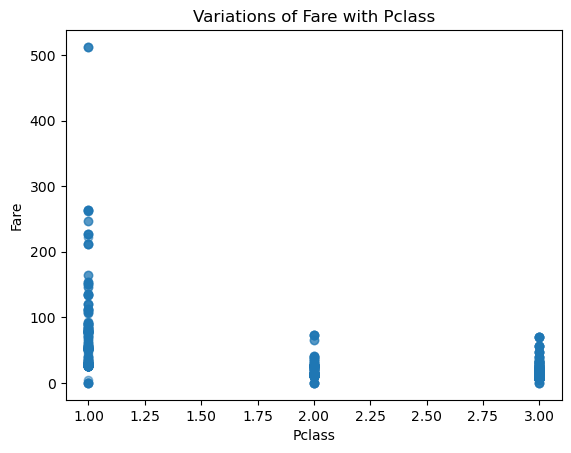

In [25]:
plt.scatter(data['Pclass'], data['Fare'], alpha = 0.5)
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.title('Variations of Fare with Pclass')
plt.show()

In [26]:
data2.head(10)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
5,0,3,male,28.0,8.4583
6,0,1,male,54.0,51.8625
7,0,3,male,2.0,21.0750
8,1,3,female,27.0,11.1333
9,1,2,female,14.0,30.0708


In [55]:
X = data3.drop('Survived', axis = 1)
y = data3['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape

(712, 4)

In [59]:

import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(4, input_shape = (4,), activation = 'relu'),
    keras.layers.Dense(5, activation = 'softmax'),
    keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 50)
                       

C:\Users\harsh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3738 - loss: 0.7854
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3661 - loss: 0.7680
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3772 - loss: 0.7442
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3880 - loss: 0.7248
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3881 - loss: 0.7131
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3511 - loss: 0.7030
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5679 - loss: 0.6904
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6332 - loss: 0.6803
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6522 - loss: 0.6680
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6422 - loss: 0.6601
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6130 - loss: 0.6578
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6343 - lo

In [61]:
model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7853 - loss: 0.5130  


[0.5194110870361328, 0.7653631567955017]

In [ ]:
model.fit(X,y, epochs = 100)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7875 - loss: 0.4953
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7745 - loss: 0.5132
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7799 - loss: 0.5025
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7798 - loss: 0.5121
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7801 - loss: 0.5033
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7859 - loss: 0.4848
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7862 - loss: 0.4951
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7904 - loss: 0.5049
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7946 - loss: 0.4908
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7663 - loss: 0.5006
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7846 - loss: 0.4820
Epoch 12/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: